### DATA102 Final Project
Submitted by **ALDECOA**, Renzel; **DUCUT**, Ezekiel; **HIDALGO**, Francisco; and **RECOMONO**, Francis <br>
Group **8** - S13

---
#### **Statement of the Problem**

NBA teams face the challenge of optimizing their draft picks to maximize the likelihood of selecting players who will have successful and impactful careers. The goal is to develop a data-driven approach that leverages historical data on player demographics, biographical details, and early career performance metrics to predict long-term success. This involves identifying key predictors of player success and building predictive models that can assist teams in making more informed draft decisions.

#### **Research Question** 

How can NBA teams optimize their draft picks to select players who are likely to have successful careers?

#### **Data Mining Objective**

Use classification and regression techniques to predict player success based on demographic and biographical details.

---
#### Importing the necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sets the theme of the charts
#plt.style.use('seaborn-darkgrid')

%matplotlib inline

---
#### Loading the dataset

The <a href="https://www.kaggle.com/datasets/justinas/nba-players-data">NBA Players</a> dataset contains over two decades of data on each player who has been part of an NBA teams' roster. It captures demographic variables such as age, height, weight and place of birth, biographical details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds, assists, etc.

In [9]:
df = pd.read_csv("NBA-Dataset/all_seasons.csv", index_col=0)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


##### Dataset infomation via `pandas`

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            10990 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           12844 no

##### Feature Descriptions

- `player_name` - Name of the player
- `team_abbreviation` - Abbreviated name of the tead the player played for (at the end of the season)
- `age` - Age of the player
- `player_height` - Height of the player (in centimeters)
- `player_weight` - Weight of the player (in kilograms)
- `college` - Name of the college the player attended
- `country` - Name of the country the player was born in (not necessarily the nationality)
- `draft_year` - Year the player was drafted
- `draft_round` - Draft round the player was picked
- `draft_number` - Number at which the player was picked in his draft round
- `gp` - Games played (throughout current season)
- `pts` - Average number of points scored per game
- `reb` - Average number of rebounds grabbed per game
- `ast` - Average number of assists distributed per game
- `net_rating` - Team's point differential per 100 possessions while the player is on court
- `oreb_pct` - Percentage of available offensive rebounds the player grabbed while he was on court
- `dreb_pct` - Percentage of available defensive rebounds the player grabbed while he was on court
- `usg_pct` - Percentage of team plays used by the player while he was on court ((FGA + Possession Ending FTA + TO) / POSS)
- `ts_pct` - Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (PTS / (2 * (FGA + 0.44 * FTA)))
- `ast_pct` - Percentage of teammate field goals the player assisted while he was on court
- `season` - NBA season

*Descriptions taken from Kaggle dataset details*

---
# **Data Cleaning**

Before we can begin exploring the data, we must first clean the dataset. This is to prevent inconsistencies that may cause problems or errors during analysis.

We will organize the dataset columns to make it easier to understand.

## Duplicates

We then check if there are any duplicated data in the dataset. We do this by calling the [duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. The function checks and returns the duplicated values if there are any in the `all_seasons_df` dataset.

In [17]:
duplicated = df[df.duplicated()]
dupes = str(duplicated.shape)

print("Number of duplicates: "  + dupes[1 : (dupes.find(','))])
print(duplicated)

Number of duplicates: 0
Empty DataFrame
Columns: [player_name, team_abbreviation, age, player_height, player_weight, college, country, draft_year, draft_round, draft_number, gp, pts, reb, ast, net_rating, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct, season]
Index: []

[0 rows x 21 columns]


## Null Values

Let's check if the dataset have any null values using `isnull().any()` function.

In [20]:
# check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64


Since there are null values in the 'college' and it is not critical for our primary analysis, let us fill it with a placeholder with "Unknown".

In [22]:
df['college'].fillna('Unknown', inplace=True)

In [23]:
# check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64


## Checking Values

Let's see if the format of the values is consistent by using the function `.unique()`.

First is the Team Abbreviation.

In [26]:
df['team_abbreviation'].unique()

array(['HOU', 'WAS', 'VAN', 'LAL', 'DEN', 'ORL', 'CHH', 'MIL', 'DET',
       'POR', 'DAL', 'UTA', 'SEA', 'BOS', 'IND', 'SAS', 'MIA', 'ATL',
       'NJN', 'LAC', 'GSW', 'PHI', 'NYK', 'TOR', 'PHX', 'MIN', 'CHI',
       'SAC', 'CLE', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'],
      dtype=object)

Seems that they all have the same 3 letter all capital format.



Now let's take a look if the there are inconsistencies in the country column.

In [28]:
df['country'].unique()

array(['USA', 'Nigeria', 'Congo', 'Canada', 'Serbia and Montenegro',
       'Ukraine', 'Croatia', 'Jamaica', 'Lithuania', 'Slovenia',
       'US Virgin Islands', 'France', 'St. Vincent & Grenadines',
       'Germany', 'Dominican Republic', 'New Zealand', 'Georgia',
       'Belize', 'England', 'Turkey', 'Greece', 'Finland', 'Senegal',
       'Mexico', 'Puerto Rico', 'China', 'Argentina', 'Mali',
       'U.S. Virgin Islands', 'Yugoslavia', 'Spain', 'Venezuela',
       'Serbia', 'Haiti', 'Russia', 'Brazil', 'Ireland', 'Scotland',
       'Poland', 'Netherlands', 'Czech Republic', 'Montenegro',
       'United Kingdom', 'Democratic Republic of the Congo', 'Latvia',
       'South Korea', 'USSR', 'Australia', 'Uruguay', 'Sudan (UK)',
       'Italy', 'Switzerland', 'Gabon', 'Cameroon', 'Iran', 'Israel',
       'Tanzania', 'Sweden', 'Panama', 'Great Britain', 'Bosnia',
       'Macedonia', 'Bosnia & Herzegovina', 'Cabo Verde', 'Tunisia',
       'South Sudan', 'Bahamas', 'Ghana', 'Austria',
      

There are no anomalies on the value names. They all have the same format for the countries in the dataset.

Therefore, the dataset seems to be in order in terms of the formatting.

---
# **Exploratory Data Analysis**
 This section of the notebook aims to explore the intricacies of a comprehensive dataset spanning over two decades of NBA player information. The purpose of this conducting this exploratory data analysis is to uncover patterns, relationships, and insights that would not only provide a better understanding of the dataset but also guide in the formulation of the research question.

 Our approach will be organized around four distinct eareas, each designed to provide a unique perspective or understanding on the data:
#### 1.   Demographics
Personal and physical attributes of NBA players. We will seek to understand how factors like height, weight, and age shape the composition of the league.

#### 2.   Performance
Statistical performance of NBA players. Examining metrics such as points, rebounds, and assists to uncover the essence of success in the NBA and perhaps explore what sets good players apart from the rest.

#### 3.   Draft
NBA draft round selections. Analyzing trends in draft round selections to uncover insights into how teams value different rounds or what factors do teams consider when drafting. Has there been a shift in emphasis in drafting?

#### 4.   Teams
Exploring the dynamics of teams and players, their histories and their relationships with player performance.



### **Demographic**

Let us explore the demographic by getting the distribution of Age, Height, and Weight among players.

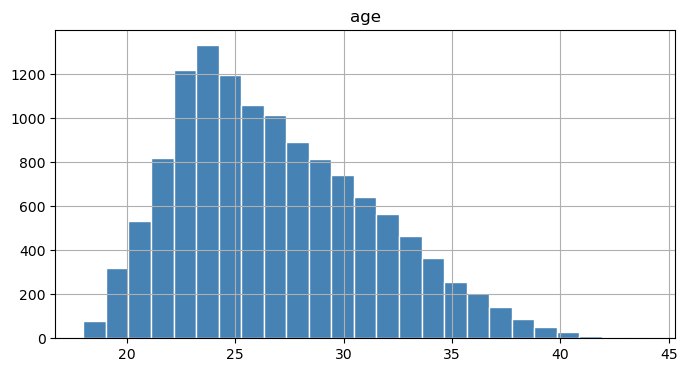

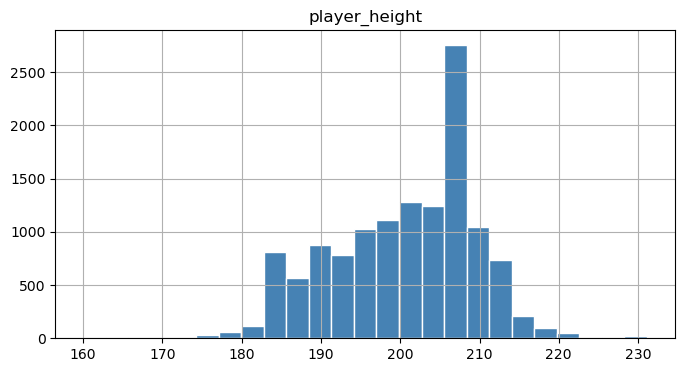

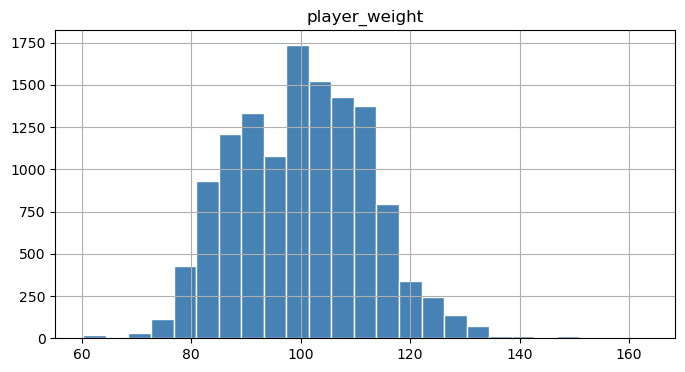

In [33]:
# Age Distribution
df.hist("age", bins=25, figsize=(8,4), edgecolor='white', color='steelblue')

# Height Distribution (in centimeters)
df.hist("player_height", bins=25, figsize=(8,4), edgecolor='white', color='steelblue')

# Weight Distribution (in kilograms)
df.hist("player_weight", bins=25, figsize=(8,4), edgecolor='white', color='steelblue')

plt.show()

Let us see if there are any correlations between them.

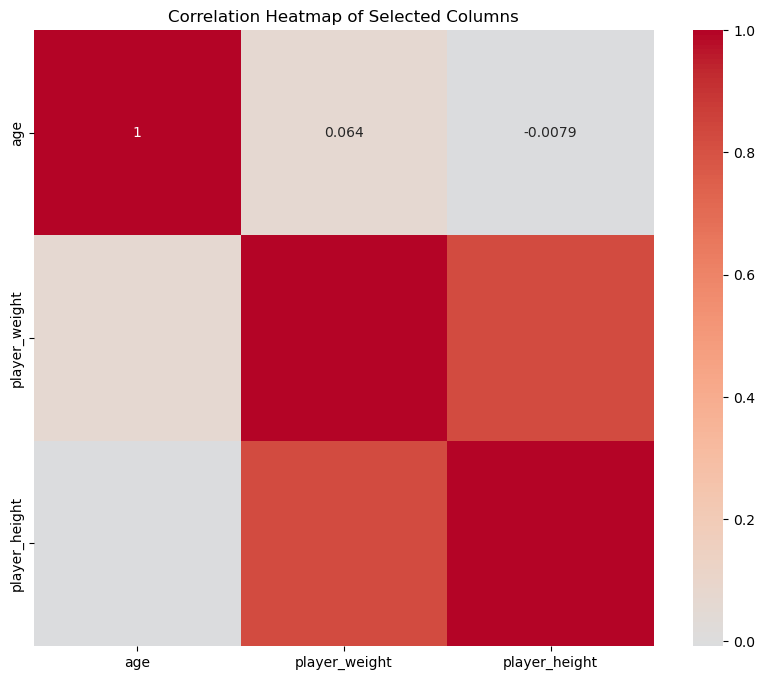

In [35]:
# Drop index column if it contains 'Unnamed'
droped_index_df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Select only the columns "age", "player_weight", and "player_height"
selected_columns = ['age', 'player_weight', 'player_height']
selected_df = droped_index_df[selected_columns]

# Compute the correlation matrix for the selected columns
corr_df = selected_df.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

Findings on the heatmap above:
We will use <a href="https://www.scribbr.com/statistics/pearson-correlation-coefficient/">Pearson Correlation Coefficient </a> as basis for the correleation between the values.
- **Age and Player Weight:** 
    - The correlation coefficient is 0.064, which is close to 0.
    - This indicates a very weak positive correlation between age and player weight.
    - It suggests that there is almost no linear relationship between a player's age and their weight.
- **Age and Player Height:** 
    - The correlation coefficient is -0.0079, which is very close to 0.
    - This indicates a very weak negative correlation between age and player height.
    - It suggests that there is almost no linear relationship between a player's age and their height.
- **Player Weight and Player Height:** 
    - The correlation coefficient is 0.82, which is quite high.
    - This indicates a strong positive correlation between player weight and player height.
    - It suggests that taller players tend to weigh more, and shorter players tend to weigh less.

### **Performance**

For Performance, we will be looking at average points, rebounds, and assists players made in each season.

To determine the average points, rebounds, and assists, we should group the dataset by the `season` column. Once the dataset is grouped by seasons, we can perform computations to calculate summary statistic that describe the average points, rebounds, and assists for each season.

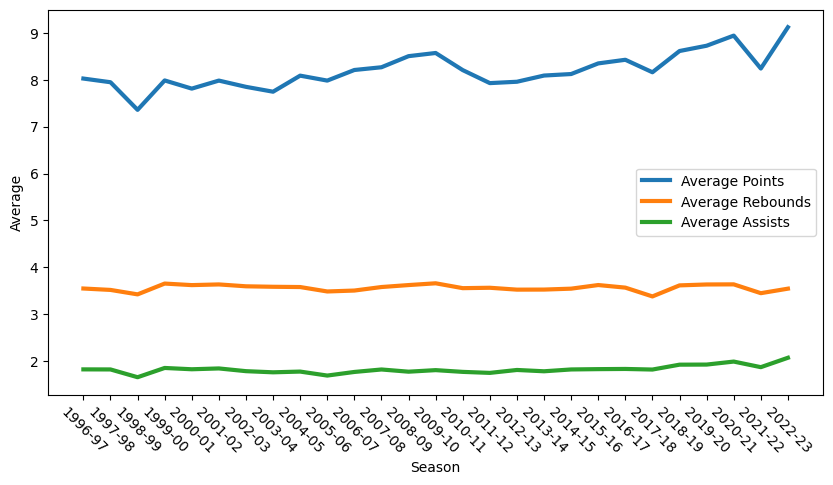

In [39]:
# Group the dataset into seasons
all_seasons_grouped = df.groupby('season')

# Compute the summary statistic for each metric
average_points_per_season = all_seasons_grouped.agg({"pts": ["mean"]})
average_rebounds_per_season = all_seasons_grouped.agg({"reb": ["mean"]})
average_assists_per_season = all_seasons_grouped.agg({"ast": ["mean"]})

# Plot average points, rebounds, and assists per season
plt.figure(figsize=(10,5))
plt.plot(average_points_per_season, label='Average Points', linewidth=3)
plt.plot(average_rebounds_per_season, label='Average Rebounds', linewidth=3)
plt.plot(average_assists_per_season, label='Average Assists', linewidth=3)

# Set labels and legend
plt.xlabel('Season')
plt.ylabel('Average')
plt.xticks(rotation=-45)
plt.legend()

plt.show()

The plot presents a visual representation of how key bastketball statistics have changed over different NBA seasons. In this case, the lackthereof. The data suggests that the average rebounds and assists by NBA players remained relatively stable and consistent. There is little to no variation or significant change in both metrics.

However, the average points per season exhibits a noticable upward trends. This entails that over the last 2 decades, the average points scored by NBA players ahve gradually increased. This upward trajectory may be reflective of changes in playing styles, strategies, or indvidiual player skills, resulting in higher average point totals over the years.

#### Comparing NBA players performance in terms of points, rebounds, and assists from 1996 season to the 2022 season.


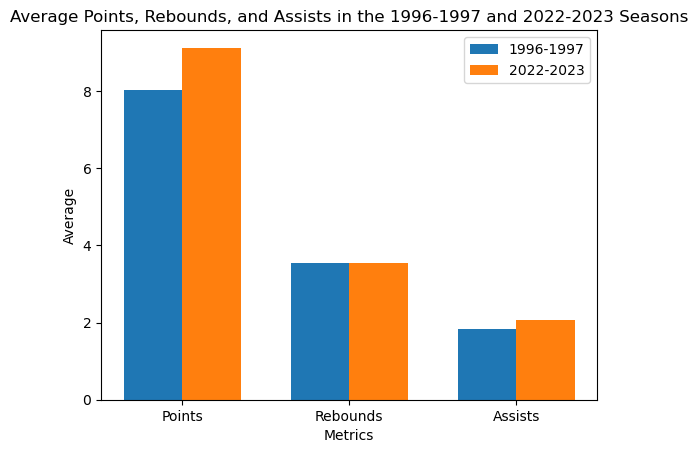

In [42]:
# Filter the data for the 1996-1997 and 2022-23 seasons
season_1996_df = df[df['season'] == '1996-97']
season_2022_df = df[df['season'] == '2022-23']

# Calculate the average points, assists, and rebounds for each season
average_points_1996 = season_1996_df['pts'].mean()
average_points_1996
average_rebounds_1996 = season_1996_df['reb'].mean()
average_assists_1996 = season_1996_df['ast'].mean()

average_points_2022 = season_2022_df['pts'].mean()
average_points_2022
average_rebounds_2022 = season_2022_df['reb'].mean()
average_assists_2022 = season_2022_df['ast'].mean()

# Define the metrics and averages for both seasons
metrics = ['Points', 'Rebounds', 'Assists']
averages_1996 = [average_points_1996, average_rebounds_1996, average_assists_1996]
averages_2022 = [average_points_2022, average_rebounds_2022, average_assists_2022]

# Create a grouped bar plot
bar_width = 0.35
index = range(len(metrics))

# Define labels for each set of bars
labels = ['1996-1997', '2022-2023']

# Create the bars and assign labels
bars_1996 = plt.bar(index, averages_1996, bar_width, align='center', label='1996-1997')
bars_2022 = plt.bar([i + bar_width for i in index], averages_2022, bar_width, align='center', label='2022-2023')

plt.xlabel('Metrics')
plt.ylabel('Average')
plt.title('Average Points, Rebounds, and Assists in the 1996-1997 and 2022-2023 Seasons')
plt.xticks([i + bar_width / 2 for i in index], metrics)

# Add a legend
plt.legend(loc='upper right')

plt.show()

The grouped bar plot illustrates the comparison of the key performance metrics between the 1996-1997 and 2022-2023 NBA seasons. The average points and assists for the 2022-2023 season are slightly higher than those for the 1996-1997 season. However, the average rebounds shows no difference.

##### Distribution of average points, rebounds, and assists

**Points**

Average number of points scored

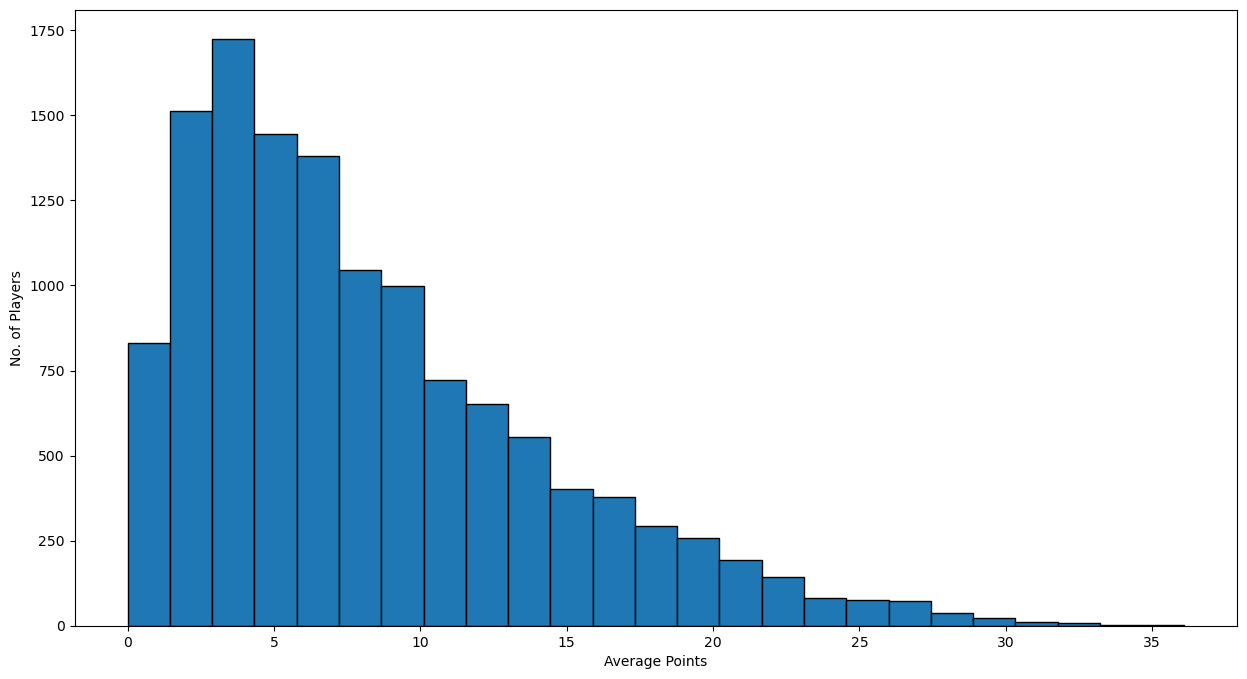

In [46]:
plt.figure(figsize=(15, 8))
plt.hist(df['pts'], bins=25, edgecolor='black')

# Add title and axis labels
plt.xlabel("Average Points")
plt.ylabel("No. of Players")
plt.show()

**Rebounds**

Average number of rebounds grabbed

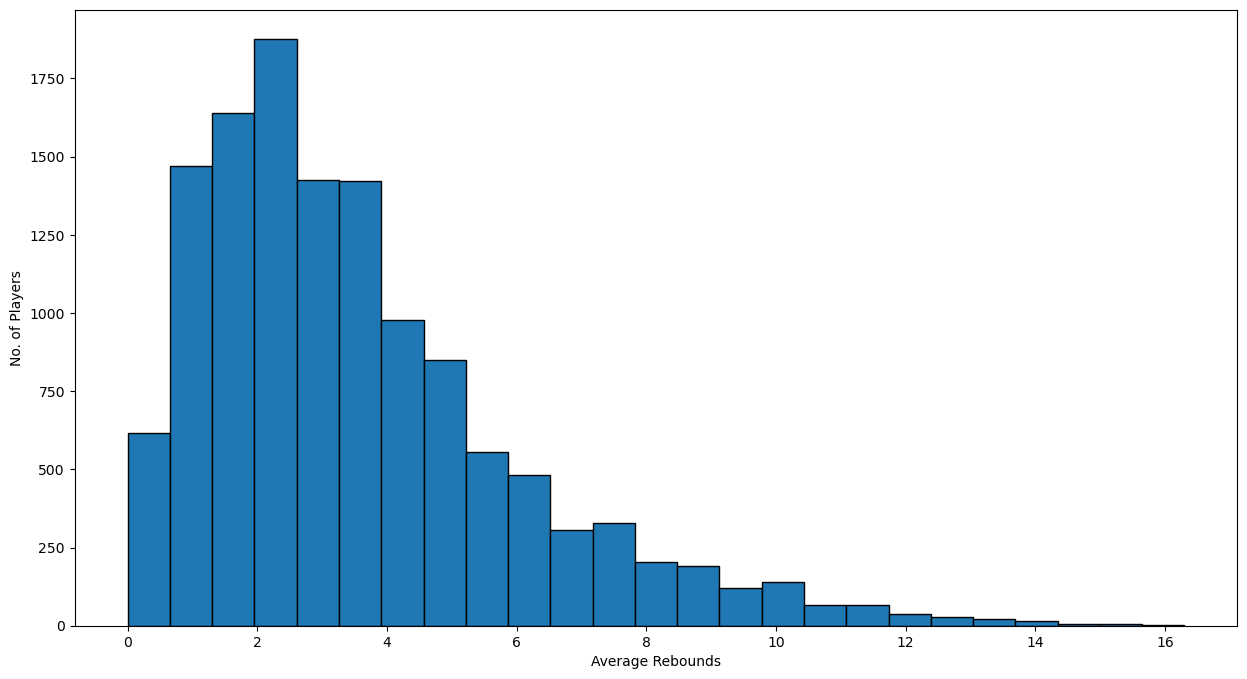

In [48]:
plt.figure(figsize=(15, 8))
plt.hist(df['reb'], bins=25, edgecolor='black')
plt.xlabel("Average Rebounds")
plt.ylabel("No. of Players")
plt.show()

**Assists**

Average number of assists distributed

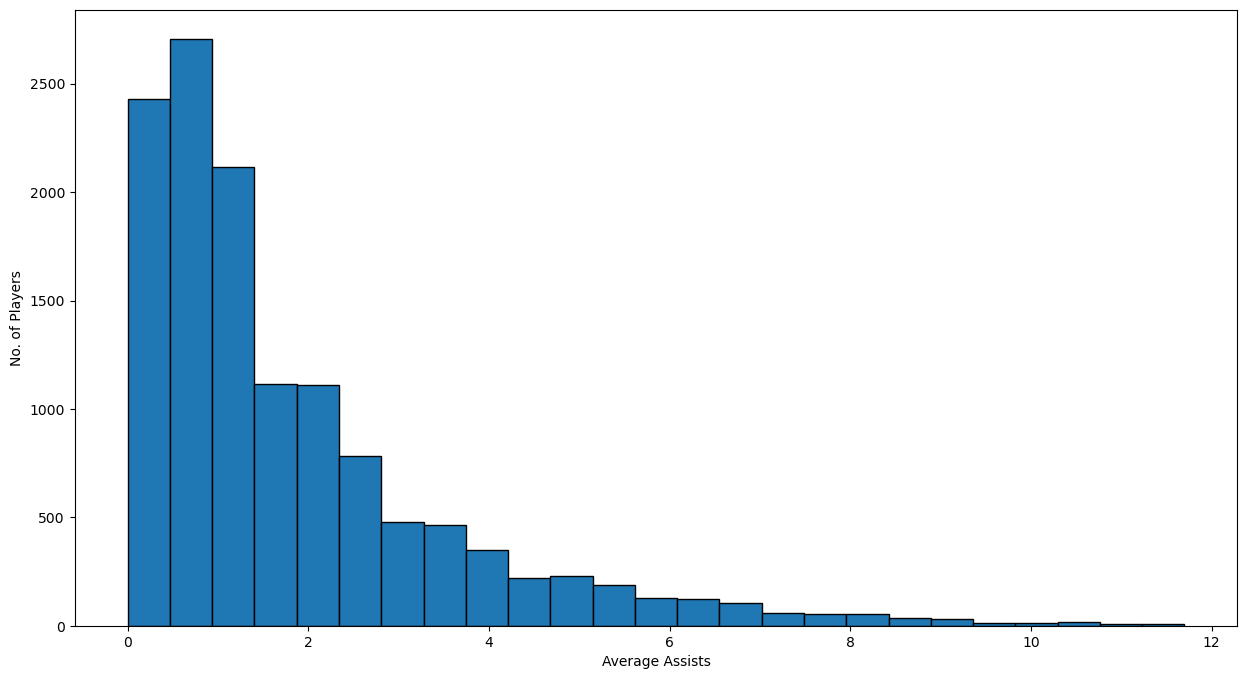

In [50]:
plt.figure(figsize=(15, 8))
plt.hist(df['ast'], bins=25, edgecolor='black')
plt.xlabel("Average Assists")
plt.ylabel("No. of Players")
plt.show()

##### Distribution of Average Percentage

**OREB_PCT**

Percentage of available offensive rebounds the player grabbed while he was on the floor

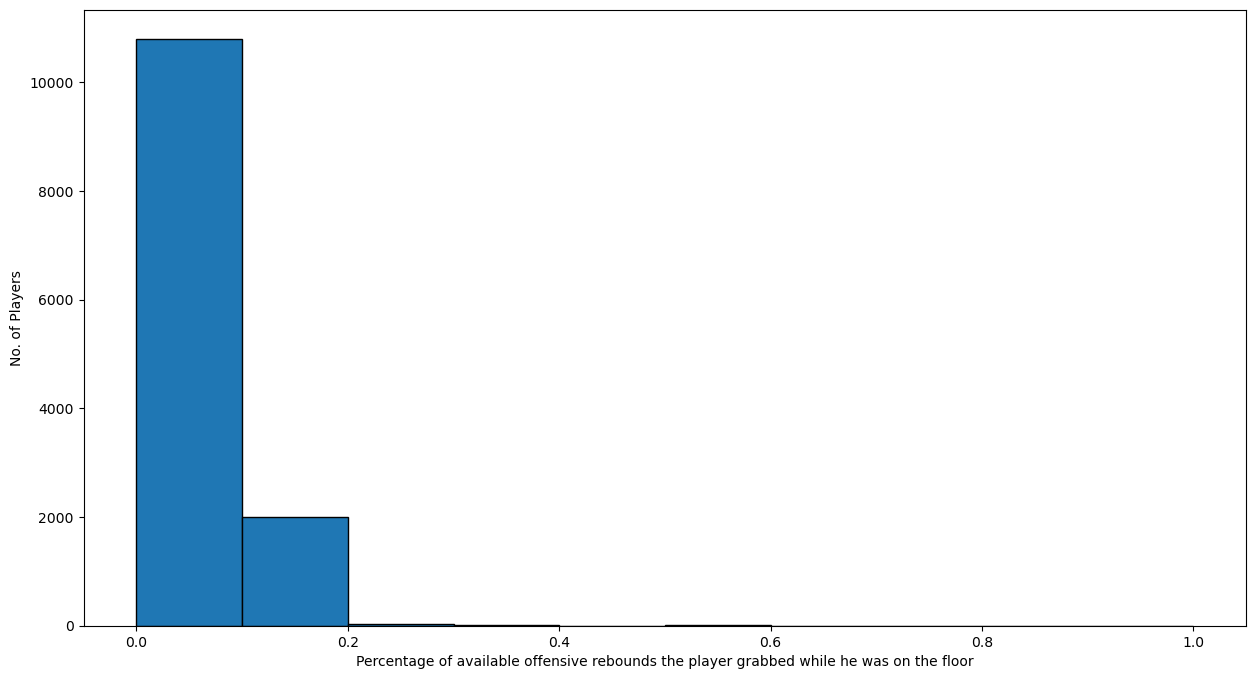

In [53]:
plt.figure(figsize=(15, 8))
plt.hist(df['oreb_pct'], bins=10, edgecolor='black')

plt.xlabel("Percentage of available offensive rebounds the player grabbed while he was on the floor")
plt.ylabel("No. of Players")
plt.show()

**DREB_PCT**

Percentage of available defensive rebounds the player grabbed while he was on the floor

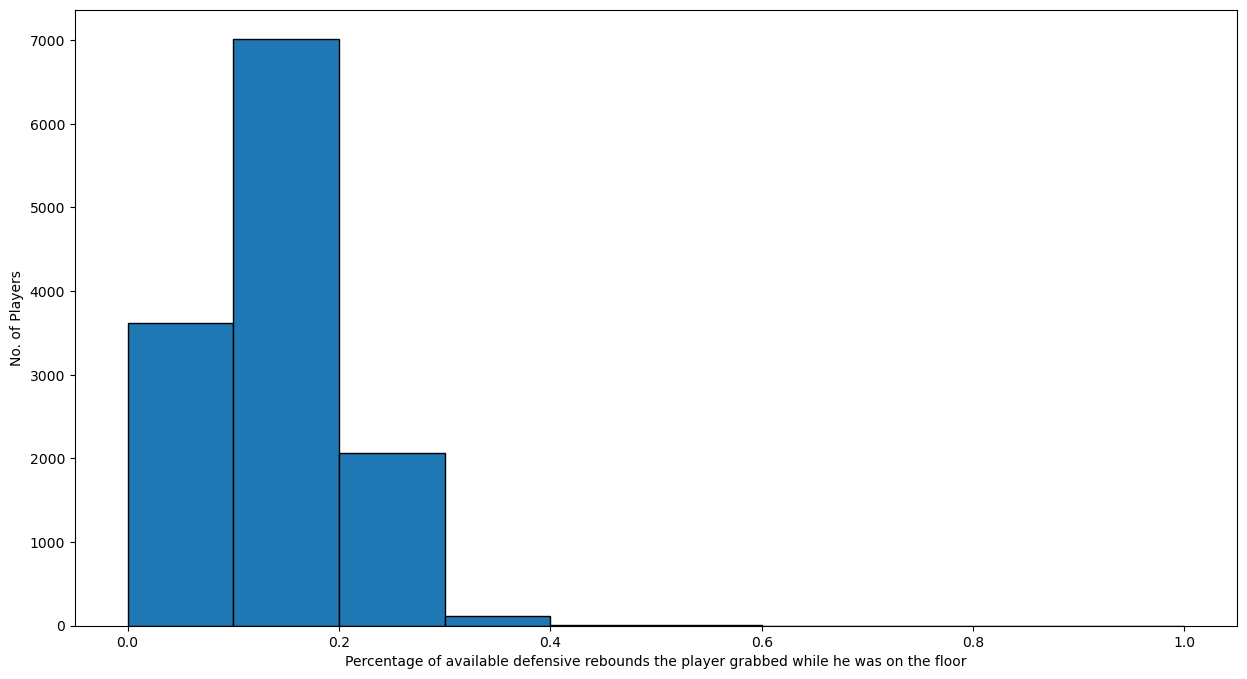

In [55]:
plt.figure(figsize=(15, 8))
plt.hist(df['dreb_pct'], bins=10, edgecolor='black')

plt.xlabel("Percentage of available defensive rebounds the player grabbed while he was on the floor")
plt.ylabel("No. of Players")
plt.show()

**USG_PCT**

Percentage of team plays used by the player while he was on the floor (FGA + Possession Ending FTA + TO) / POSS)

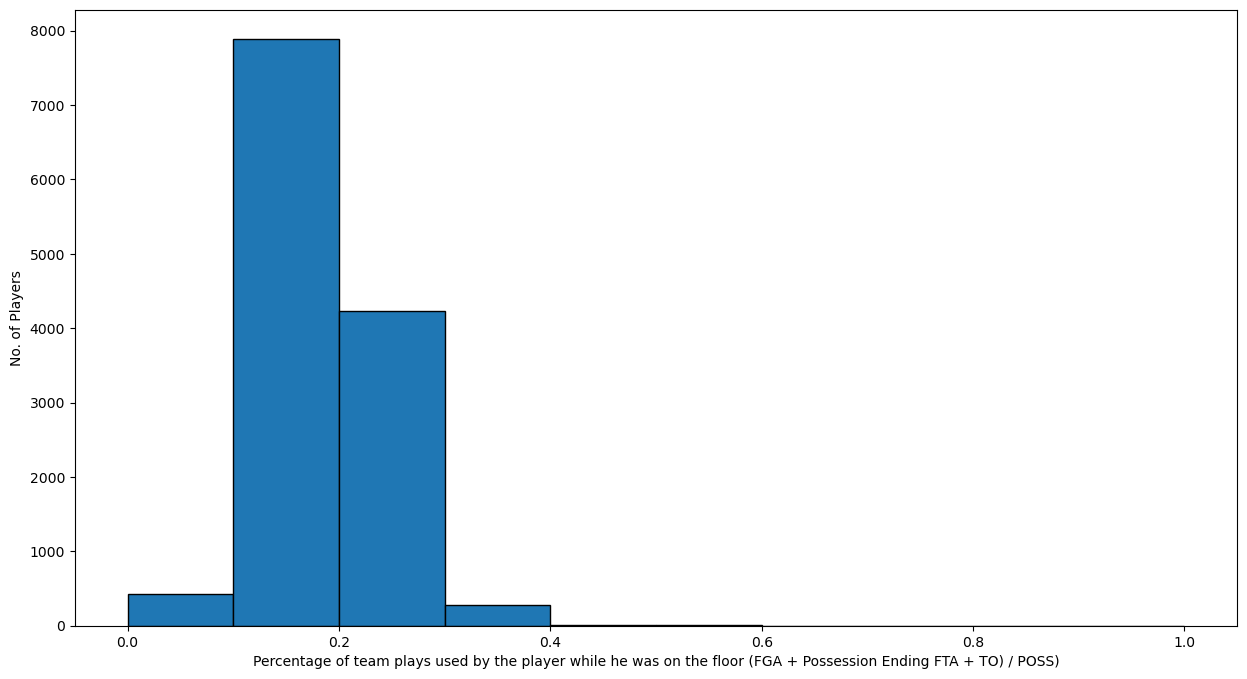

In [57]:
plt.figure(figsize=(15, 8))
plt.hist(df['usg_pct'], bins=10, edgecolor='black')

plt.xlabel("Percentage of team plays used by the player while he was on the floor (FGA + Possession Ending FTA + TO) / POSS)")
plt.ylabel("No. of Players")
plt.show()

**TS_PCT**

Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (PTS / (2*(FGA + 0.44 * FTA)))

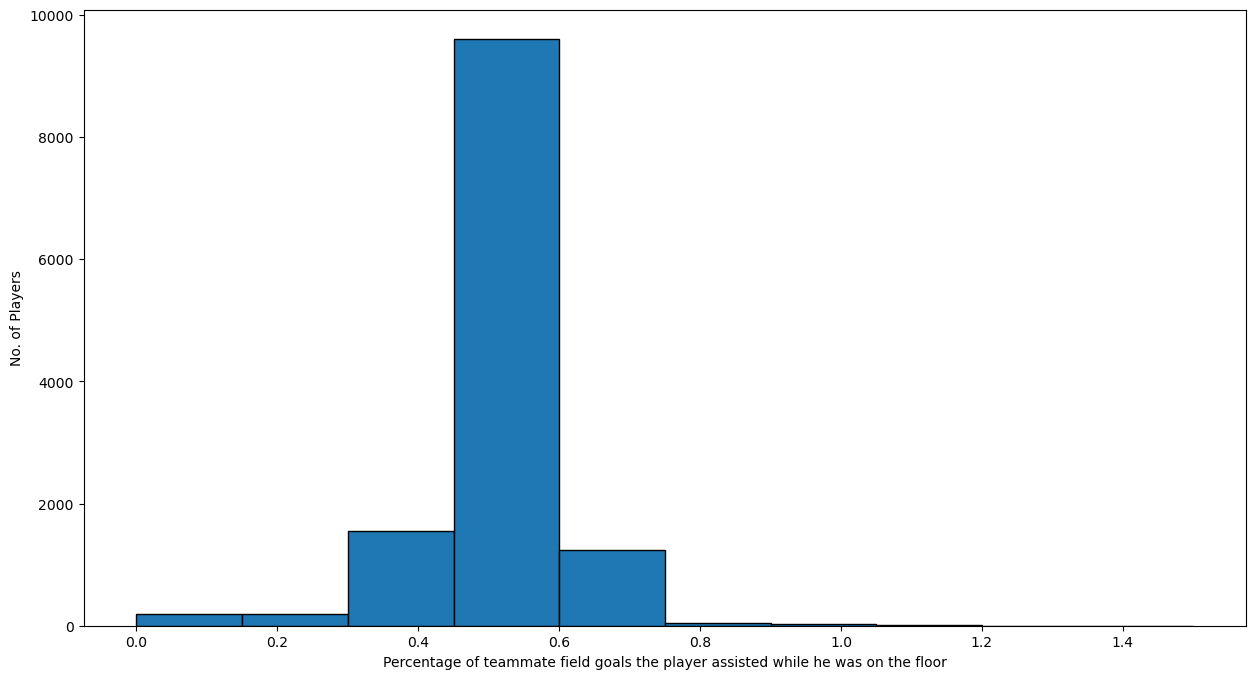

In [59]:
plt.figure(figsize=(15, 8))
plt.hist(df['ts_pct'], bins=10, edgecolor='black')

plt.xlabel("Percentage of teammate field goals the player assisted while he was on the floor")
plt.ylabel("No. of Players")
plt.show()

**AST_PCT**

Percentage of teammate field goals the player assisted while he was on the floor

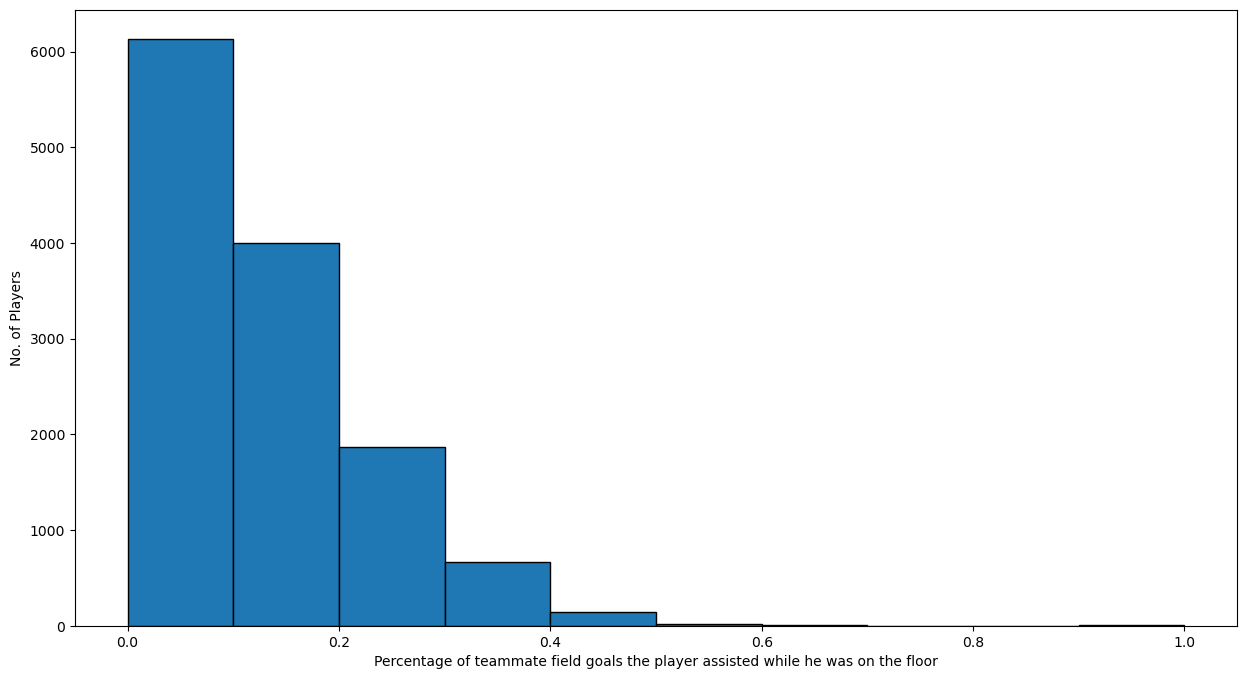

In [61]:
plt.figure(figsize=(15, 8))
plt.hist(df['ast_pct'], bins=10, edgecolor='black')

plt.xlabel("Percentage of teammate field goals the player assisted while he was on the floor")
plt.ylabel("No. of Players")
plt.show()

**Correlation of all the values we explored**

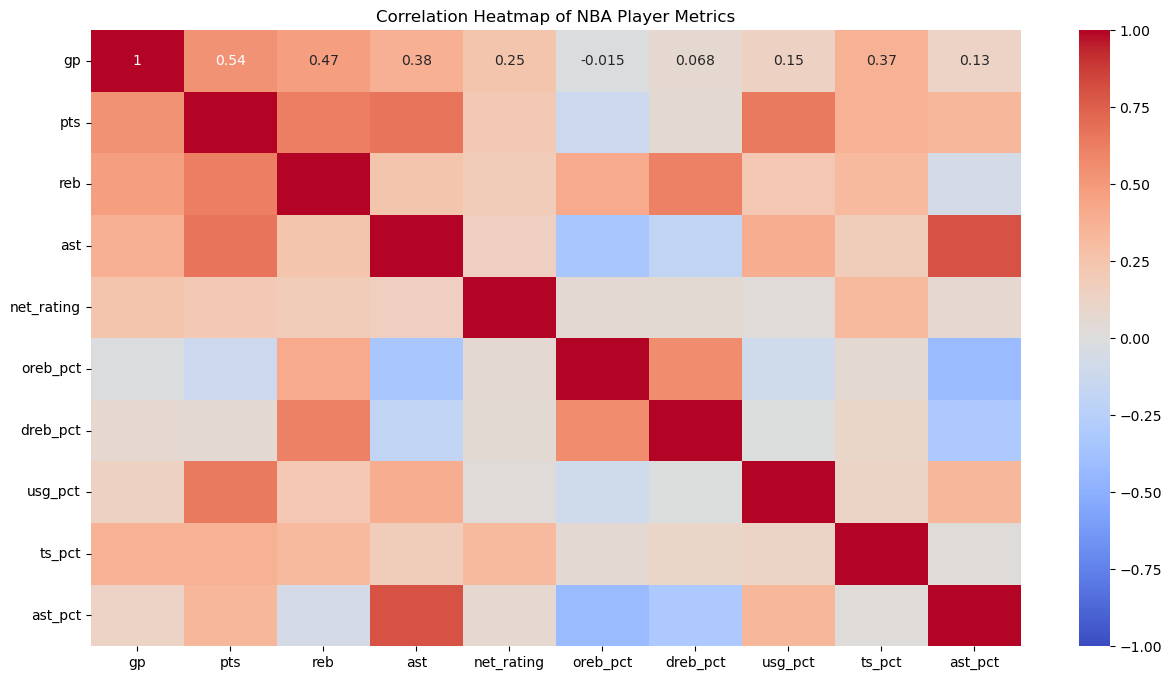

In [63]:
# Select only the columns of interest
columns_of_interest = ['gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
filtered_df = df[columns_of_interest]

# Compute the correlation matrix
corr_df = filtered_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of NBA Player Metrics')
plt.show()

### **Draft**

Let us get the trends in Draft Round Selections

#### First is getting the average age, height, and weight of players drafted in the first round of each season.

#### Age

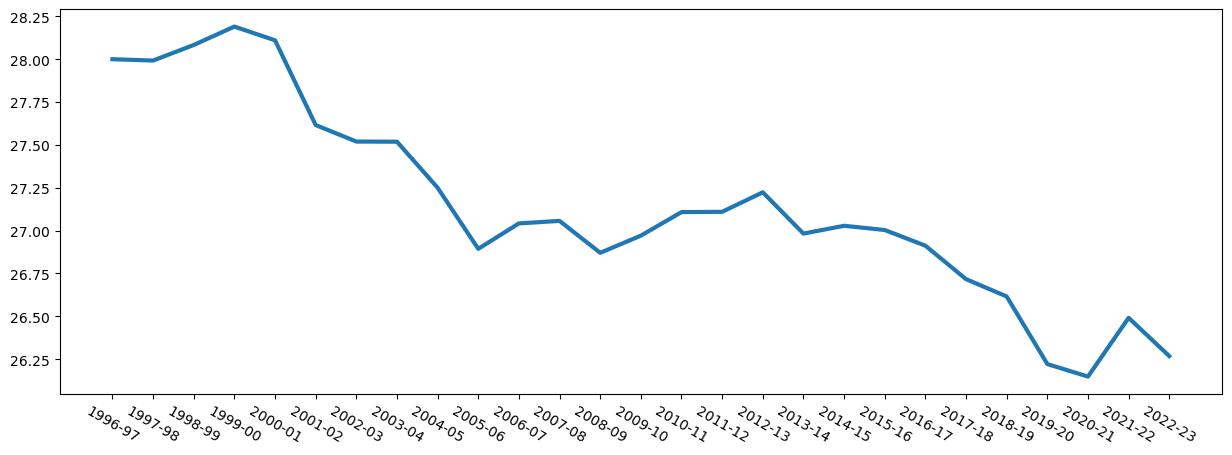

In [68]:
# Get players that are drafted in round 1 per season and get age mean
mean_age_firstround = df[df['draft_round'] == '1'].groupby('season').agg({"age" : ['mean']})

plt.figure(figsize=(15,5))
plt.xticks(rotation=-30)

# Plot
plt.plot(mean_age_firstround, linewidth=3)

#### Height

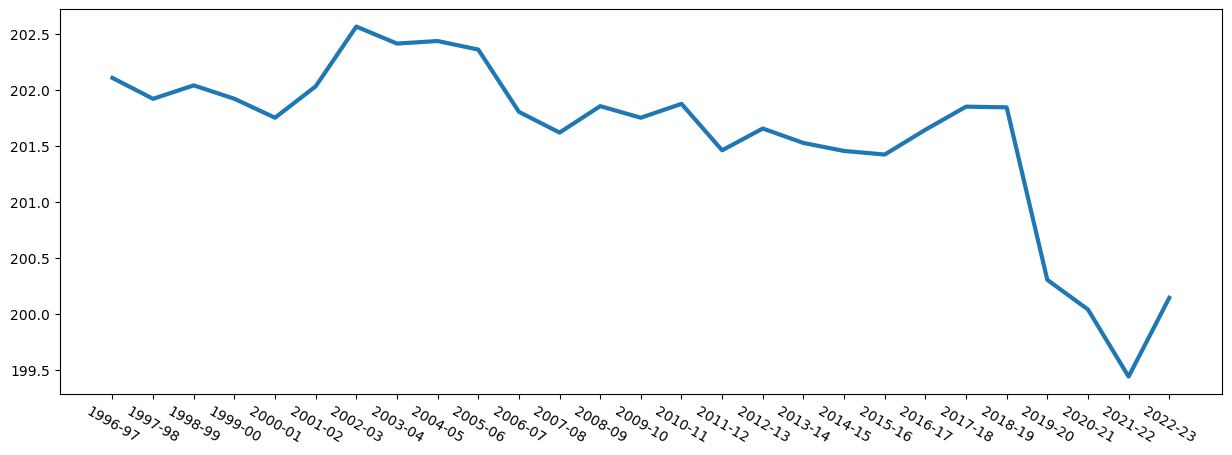

In [70]:
# Get players that are drafted in round 1 per season and get height mean
mean_height_firstround = df[df['draft_round'] == '1'].groupby('season').agg({"player_height" : ['mean']})

plt.figure(figsize=(15,5))
plt.xticks(rotation=-30)

plt.plot(mean_height_firstround, linewidth=3)

#### Weight

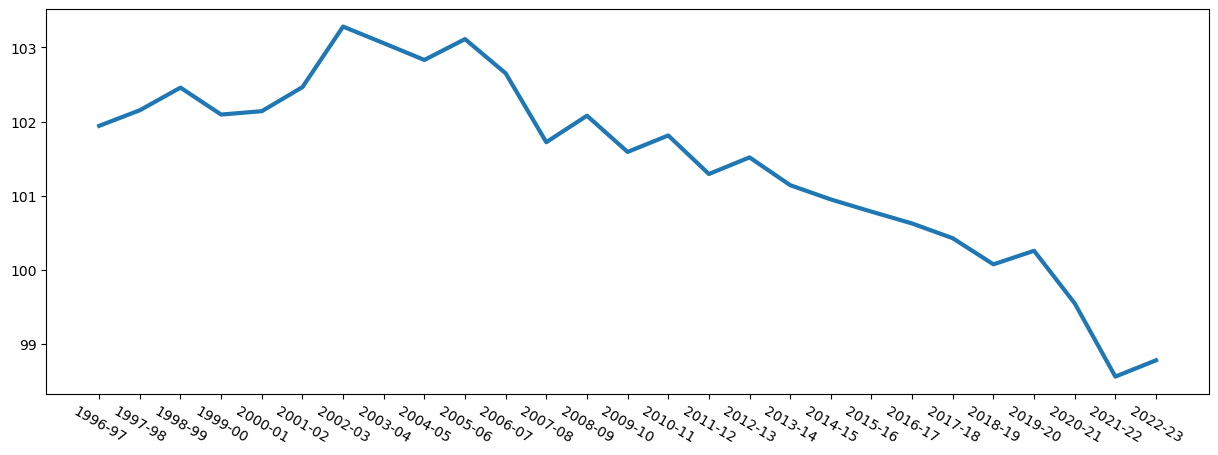

In [72]:
# Get players that are drafted in round 1 per season and get weight mean
mean_weight_firstround = df[df['draft_round'] == '1'].groupby('season').agg({"player_weight" : ['mean']})

plt.figure(figsize=(15,5))
plt.xticks(rotation=-30)

plt.plot(mean_weight_firstround, linewidth=3)

#### Let us now get the average points, rebounds, and assists.

#### Points

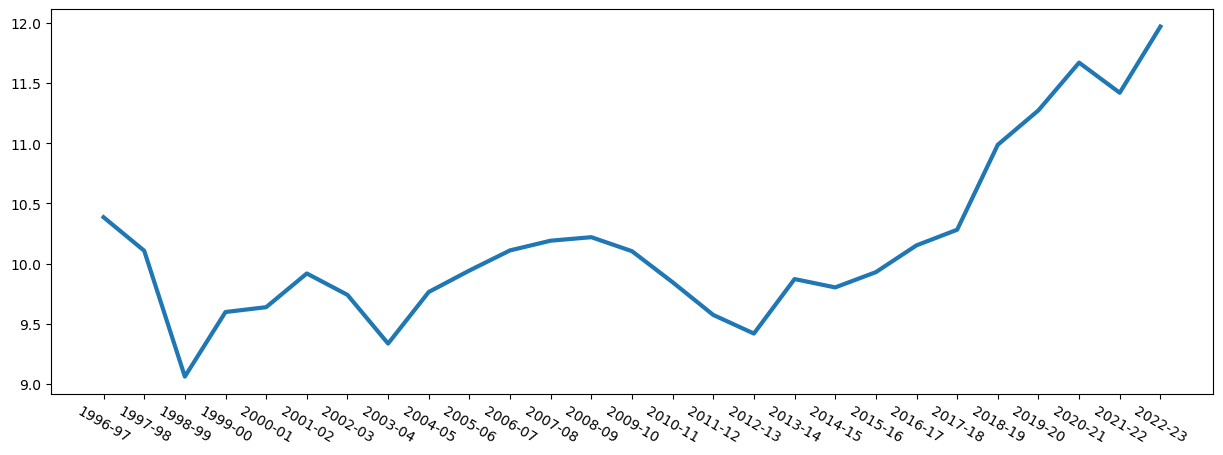

In [75]:
# Get players that are drafted in round 1 per season and get points mean
mean_weight_firstround = df[df['draft_round'] == '1'].groupby('season').agg({"pts" : ['mean']})

plt.figure(figsize=(15,5))
plt.xticks(rotation=-30)

plt.plot(mean_weight_firstround, linewidth=3)

#### Rebounds

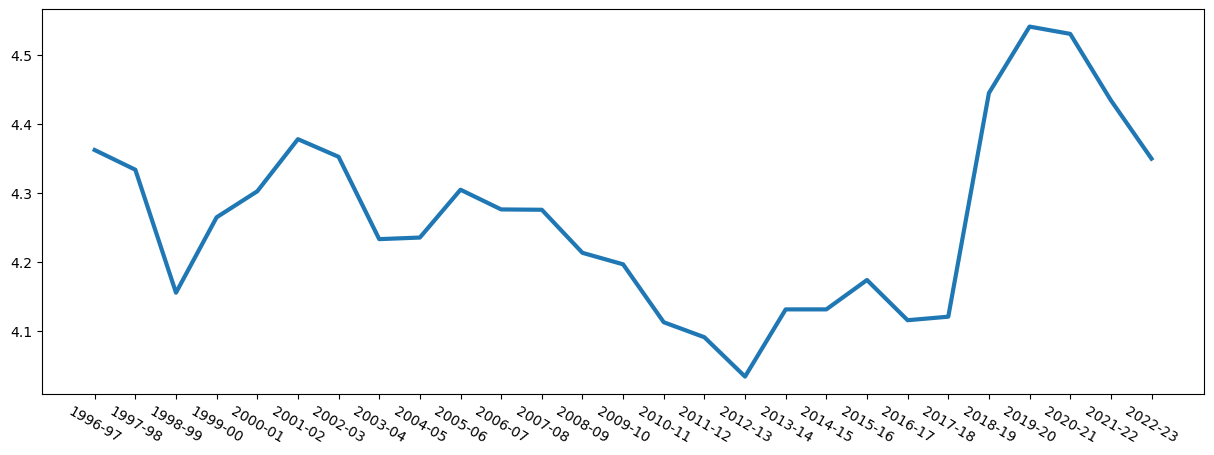

In [77]:
# Get players that are drafted in round 1 per season and get rebounds mean
mean_weight_firstround = df[df['draft_round'] == '1'].groupby('season').agg({"reb" : ['mean']})

plt.figure(figsize=(15,5))
plt.xticks(rotation=-30)

plt.plot(mean_weight_firstround, linewidth=3)

#### Assists

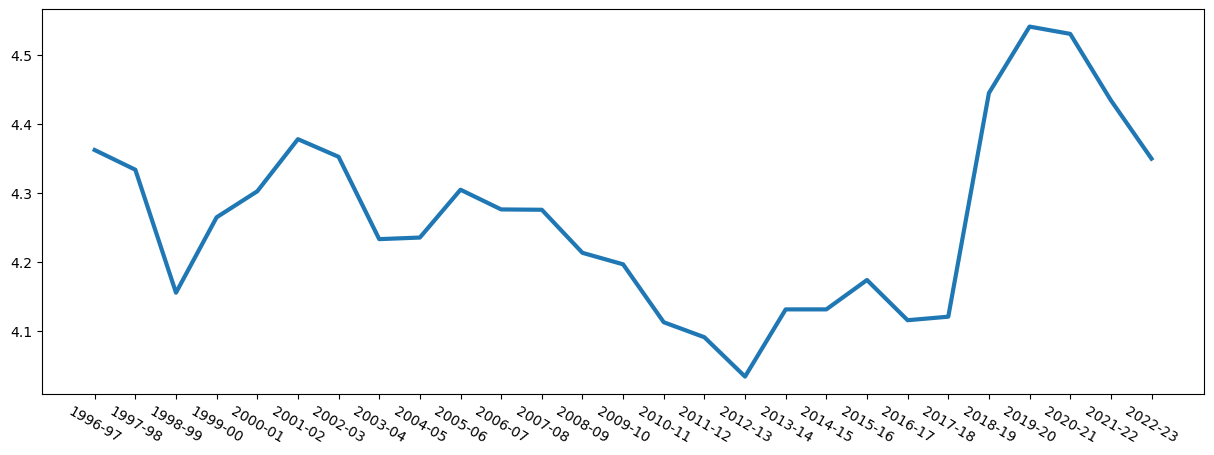

In [79]:
# Get players that are drafted in round 1 per season and get assists mean
mean_weight_firstround = df[df['draft_round'] == '1'].groupby('season').agg({"reb" : ['mean']})

plt.figure(figsize=(15,5))
plt.xticks(rotation=-30)

plt.plot(mean_weight_firstround, linewidth=3)

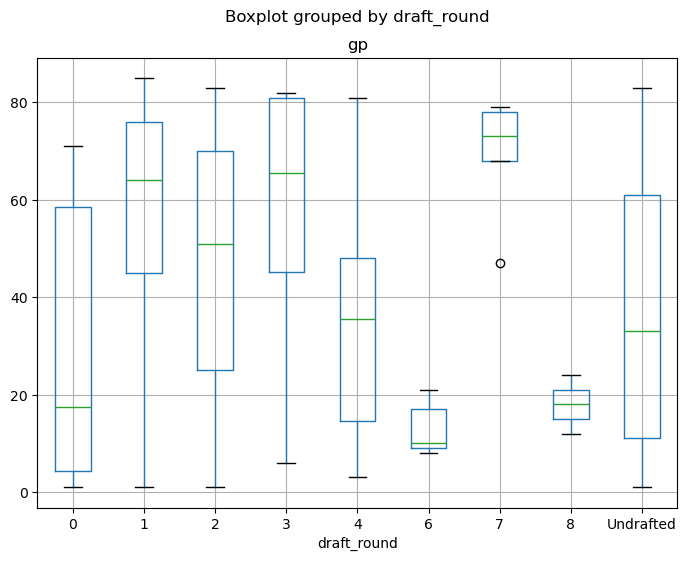

In [80]:
df.boxplot("gp", by="draft_round", figsize=(8,6))
plt.show()

### **Teams**

Let us now explore each teams in the NBA.

Finding the number of players in each team in the 1996-1997 season

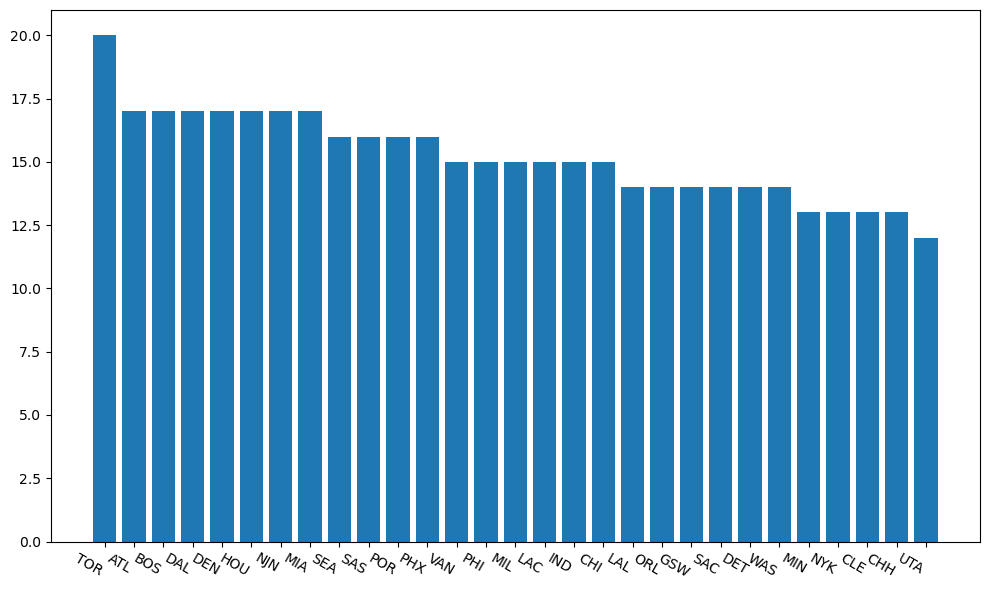

In [84]:
filtered_data_1996 = df[df['season'].str.startswith('1996-')]
team_player_counts = filtered_data_1996.groupby('team_abbreviation')['player_name'].count()
results_df = pd.DataFrame({'Team': team_player_counts.index, 'Number of Players': team_player_counts.values})
results_df = results_df.sort_values(by='Number of Players', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(results_df['Team'], results_df['Number of Players'])
plt.xlabel = ('Team')
plt.ylabel = ('Number of Players')
plt.title = ('Number of Players per Team in the 1996 Season')
plt.xticks(rotation=-30, ha='right')

plt.tight_layout()
plt.show()

We will take the **top 10 teams** with the highest player count. These are the list of teams with the number of players sorted from highest to lowest during the 1996 - 1997 season:
1. `TOR`
2. `ATL`
3. `BOS`
4. `DAL`
5. `DEN`
6. `HOU`
7. `NJN`
8. `MIA`
9. `SEA`
10. `SAS`

Number of players in each team in the 2022-2023 season

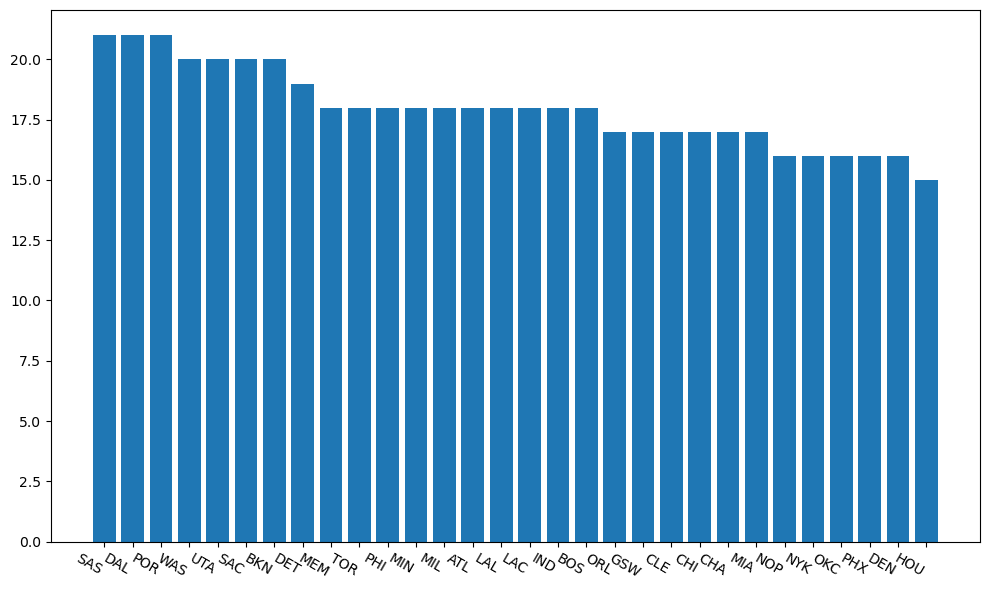

In [87]:
filtered_data_2022 = df[df['season'].str.startswith('2022-')]
team_player_counts = filtered_data_2022.groupby('team_abbreviation')['player_name'].count()
results_df = pd.DataFrame({'Team': team_player_counts.index, 'Number of Players': team_player_counts.values})
results_df = results_df.sort_values(by='Number of Players', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(results_df['Team'], results_df['Number of Players'])
plt.xlabel = ('Team')
plt.ylabel = ('Number of Players')
plt.title = ('Number of Players per Team in the 2022 Season')
plt.xticks(rotation=-30, ha='right')

plt.tight_layout()
plt.show()

We will take the **top 10 teams** with the highest player count. These are the list of teams with the number of players sorted from highest to lowest during the 2022 - 2023 season:
1. `SAS`
2. `DAL`
3. `POR`
4. `WAS`
5. `UTA`
6. `SAC`
7. `BKN`
8. `DET`
9. `MEM`
10. `TOR`


#### Team Performance

Average net rating of each time in the season 2022-2023 season.

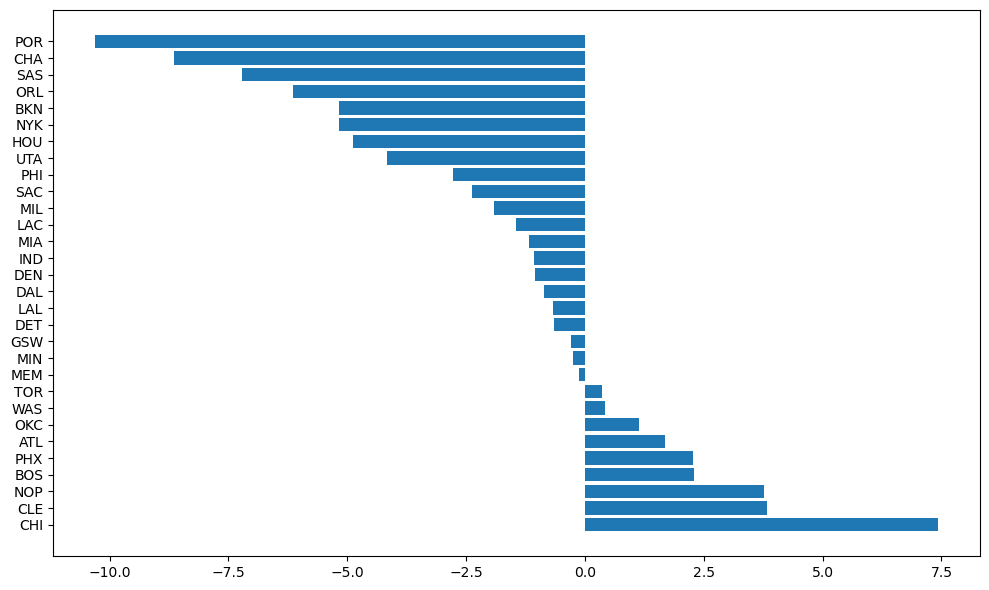

In [91]:
filtered_data_2022 = df[df['season'].str.startswith('2022-')]
team_net_rating_mean = filtered_data_2022.groupby('team_abbreviation')['net_rating'].mean().reset_index()
team_net_rating_mean = team_net_rating_mean.sort_values(by='net_rating', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(team_net_rating_mean['team_abbreviation'], team_net_rating_mean['net_rating'])
plt.xlabel = ('Average Net Rating')
plt.ylabel = ('Team')
plt.title = ('Average Net Rating per Team in the 2022 Season')

plt.tight_layout()
plt.show()

We will take the **top 5 teams** with the **highest** net rating. These are the list of teams with the highest net rating during the 2022 - 2023 season:
1. `POR`
2. `CHA`
3. `SAS`
4. `ORL`
5. `BKN`

We will take the **top 5 teams** with the **lowest** net rating. These are the list of teams with the lowest net rating during the 2022 - 2023 season:
1. `CHI`
2. `CLE`
3. `NOP`
4. `BOS`
5. `PHX`

Average net rating of each time in the season 1996-1997 season.

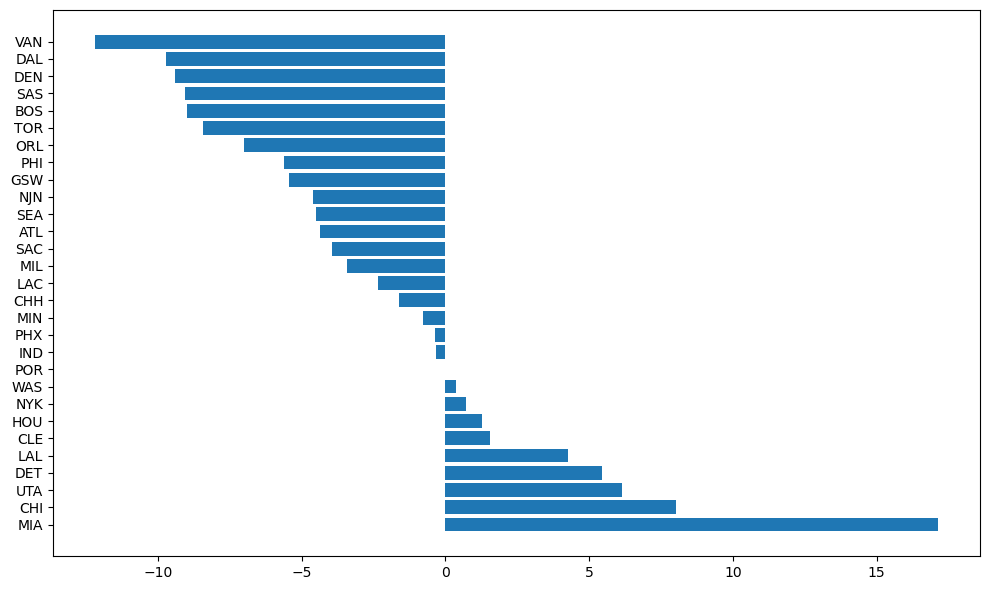

In [94]:
filtered_data_1996 = df[df['season'].str.startswith('1996-')]
team_net_rating_mean = filtered_data_1996.groupby('team_abbreviation')['net_rating'].mean().reset_index()
team_net_rating_mean = team_net_rating_mean.sort_values(by='net_rating', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(team_net_rating_mean['team_abbreviation'], team_net_rating_mean['net_rating'])
plt.xlabel = ('Average Net Rating')
plt.ylabel = ('Team')
plt.title = ('Average Net Rating per Team in the 1996 Season')

plt.tight_layout()
plt.show()

We will take the **top 5 teams** with the **highest** net rating. These are the list of teams with the highest net rating during the 1996 - 1997 season:
1. `VAN`
2. `DAL`
3. `DEN`
4. `SAS`
5. `BOS`

We will take the **top 5 teams** with the **lowest** net rating. These are the list of teams with the lowest net rating during the 1996 - 1997 season:
1. `MIA`
2. `CHI`
3. `UTA`
4. `DET`
5. `LAL`

In [96]:
df.head(3)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97


**Unique values**

In [98]:
player_num = len(df["player_name"].unique())
college_num = len(df["college"].unique())
season_num = len(df["season"].unique())

print(f"Number of unique players (across all seasons): {player_num}")
print(f"Number of unique colleges: {college_num}")

Number of unique players (across all seasons): 2551
Number of unique colleges: 357


**Draft rounds and numbers** <br>
These values indicate at what order did the player get drafted into a team for the current season. Being picked first, either in the first round (`draft_round` = 1) or the first in a round (`draft_number` = 1), can be a sign of acknowldegement by the NBA teams for a player's talent on the court (<a href="https://www.bbc.co.uk/newsround/65997816">BBC, 2023</a>). 

In [100]:
df["draft_round"].unique()

array(['2', '1', 'Undrafted', '3', '4', '8', '6', '7', '0'], dtype=object)

In [101]:
df.loc[df["draft_round"] == '0']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10651,Jeremy Pargo,GSW,34.0,187.96,99.336648,Gonzaga,USA,2009,0,0,...,8.3,1.0,2.7,2.4,0.024,0.048,0.268,0.557,0.308,2019-20
10791,Josh Magette,ORL,30.0,185.42,72.574720,Alabama Huntsville,USA,2012,0,0,...,1.5,0.8,0.6,2.4,0.022,0.128,0.226,0.378,0.238,2019-20
10966,T.J. McConnell,IND,28.0,185.42,86.182480,Arizona,USA,2015,0,Undrafted,...,6.5,2.7,5.0,1.1,0.028,0.107,0.167,0.540,0.354,2019-20
11498,T.J. McConnell,IND,29.0,185.42,86.182480,Arizona,USA,2015,0,Undrafted,...,8.6,3.7,6.6,2.5,0.030,0.106,0.149,0.583,0.337,2020-21
12247,T.J. McConnell,IND,30.0,185.42,86.182480,Arizona,USA,2015,0,Undrafted,...,8.5,3.3,4.9,-5.5,0.029,0.110,0.157,0.525,0.287,2021-22
12266,Scotty Hopson,OKC,32.0,200.66,92.532768,Tennessee,USA,2011,0,0,...,4.0,1.0,1.0,-18.4,0.000,0.043,0.143,0.500,0.091,2021-22


The number `0` and the word `Undrafted` under the columns `draft_round` and `draft_number` mean the same thing, so we map the rows containing `Undrafted` with `0` to remain consistent with the data type and meaning of the values.

In [103]:
df["draft_round"] = df["draft_round"].replace({
    "Undrafted": 0
})

df["draft_number"] = df["draft_number"].replace({
    "Undrafted": 0
})

# Converting the values in draft_round and draft_number into integers
df["draft_round"] = pd.to_numeric(df["draft_round"])
df["draft_number"] = pd.to_numeric(df["draft_number"])

In [104]:
print(df["draft_round"].unique())
print(df["draft_number"].unique())

[2 1 0 3 4 8 6 7]
[ 42  34  12   7  22  47  30   4   1   3  11  33  26  35  17  25  28  49
  23   2  15  27   0  37  38  13  18   9  21  43  14  10   6  57  52  32
  39  46  29  16  45  20  48   5  79  41  51  36  75  56   8  24 165  40
  19  58  44 139  54 127 124  50 160  63  31  69  53  55 120  87  66  82
  60  59  78]


---
# **Data Preprocessing**

Let us now preprocess the dataframe for model training in the next part.

Preprocessing is preparing the data for training the chosen model. It helps improve the performance of the model to make it more accurate and effecient.

##### **Handle Missing Values**

Some model can handle missing values, but it is often beneficial to preprocess them to improve model performance.

Here we will fill missing numerical values to maintain integrity of the dataset.

In [109]:
# Fill missing numerical values with median
numerical_columns = ['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 
                     'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)


# Fill missing values
df['college'] = df['college'].fillna('No College')


In [110]:
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,0,0,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


##### **Converting Categorical Variables**

Use label encoding for categorical variables to convert them into numerical format.

Label Encoding is converting categorical columns with a limited number of categories to numerical format

In [113]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['team_abbreviation', 'college', 'country', 'season'], drop_first=True)

##### **Feature Engineering**

Let us create new features or transform existing ones to capture relevant patterns.

- **Draft Position:** Combine draft_round and draft_number into a single feature.
- **Player BMI:** Calculate the Body Mass Index (BMI) of the player using height and weight.
- **Player Experience:** Calculate the number of years since the player was drafted.

In [116]:
# Ensure draft_year is numeric
if 'draft_year' in df.columns:
    df['draft_year'] = pd.to_numeric(df['draft_year'], errors='coerce')

if 'draft_round' in df.columns:
    df['draft_round'] = pd.to_numeric(df['draft_round'], errors='coerce')

if 'draft_number' in df.columns:
    df['draft_number'] = pd.to_numeric(df['draft_number'], errors='coerce')

# Feature engineering
if 'draft_round' in df.columns and 'draft_number' in df.columns:
    df['draft_position'] = df['draft_round'] * 30 + df['draft_number']
    df.drop(columns=['draft_round', 'draft_number'], inplace=True)

if 'player_weight' in df.columns and 'player_height' in df.columns:
    df['player_bmi'] = df['player_weight'] / (df['player_height'] / 100) ** 2

# Convert season to numeric and calculate experience
if 'season' in df.columns and 'draft_year' in df.columns:
    df['season_start_year'] = df['season'].apply(lambda x: int(x.split('-')[0]) if isinstance(x, str) else np.nan)
    df['experience'] = df['season_start_year'] - df['draft_year']
    df.drop(columns=['season_start_year'], inplace=True)

##### **Handling Outliers**

Identify and handle outliers in the numerical data to prevent skewing the model.

In [118]:
def remove_outliers(df, columns, z_thresh=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < z_thresh]
    return df

df = remove_outliers(df, numerical_columns)

##### Stardize the numerical columns

In [120]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns
numerical_cols = ['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 
                  'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

# Standardize the numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

##### **Feature Selection**
Select relevant features for the model to improve performance and reduce overfitting.

We define Successful Career if a player meets at least two of the following criteria:

- Points Per Game (PTS): Average of at least 15 points per game.
- Rebounds Per Game (REB): Average of at least 7 rebounds per game.
- Player Efficiency Rating (PER): PER of at least 18.
- True Shooting Percentage (TS%): Above 55%.
- Games Played (GP): More than 500 games.

Research Sources:
 - Player Efficiency Rating (PER): PER is widely used and discussed in basketball analytics. A PER above 15 is considered average, and a PER above 20 indicates elite performance (Hollinger, J. (2002). Pro Basketball Prospectus).

- True Shooting Percentage (TS%): TS% is a common metric for evaluating shooting efficiency and is used by various basketball analytics sources (Kubatko, J., Oliver, D., Pelton, K., & Sagarin, M. (2007). NBA Player Statistics and the True Shooting Percentage).

- Points Per Game and Rebounds Per Game: These are traditional and widely accepted metrics for evaluating player performance and success (NBA Historical Stats and Analysis).

In [124]:
df['successful_career'] = (
    ((df['pts'] > 15) & (df['reb'] > 7)) |
    (df['net_rating'] > 1) |
    (df['ts_pct'] > 0.55) |
    (df['gp'] > 500)
).astype(int)

X = df.drop(columns=['player_name', 'draft_year', 'successful_career'])
y = df['successful_career']

##### **Splitting Data into Training and Testing Sets**

Divide the dataset into training and testing sets to evaluate the model's performance.

In [126]:
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Undersampling and Oversampling**

In [128]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your undersampling method
undersampler = RandomUnderSampler(random_state=42)

# Define your oversampling method
oversampler = SMOTE(random_state=42)

---
# **Model Training**
Below are the models that we chose to train to attain the objectives we have set. These models are the following:
- **Logistic Regression**,
- **Support Vector Machine (Classifier)**,
- **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html">Multinomial Naive Bayes</a>**; and,
- **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">Multi-Layer Perceptron Classifier</a>**

For the interest of time, we excluded the steps for hyperparameter tuning. The models seen here are instantiated with the best combination of parameters according to our tests using either GridSearchCV or RandomizedSearchCV.

#### **Logistic Regression**

Logistic Regression is a fundamental statistical method used for binary classification, making it particularly valuable for addressing the research question. It is used in this research to provide a straightforward, interpretable, and effective method for predicting which NBA players are likely to have successful careers, thus aiding teams in making more informed draft decisions.

**Creating Pipeline for the Model**

In [132]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as imPipeline

# Initialize logistic regression model with optimal hyperparameters
log_model = LogisticRegression(max_iter=1000, solver='liblinear', C=0.01, penalty='l1')

# Create a pipeline with undersampling, oversampling, standard scaler, and logistic regression
logreg_pipeline = imPipeline([
    ('under', undersampler),
    ('over', oversampler),
    ('scaler', StandardScaler()),
    ('logistic', log_model)
])

**Training the Model and Making Prediction**

In [134]:
# Train the model
logreg_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_pipeline.predict(X_test)

**Evaluation and Cross-validation of the Model**

In [136]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Perform cross-validation 
cv_scores = cross_val_score(logreg_pipeline, X, y, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Accuracy: 0.8651928912006935
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1502
           1       0.76      0.91      0.82       805

    accuracy                           0.87      2307
   macro avg       0.85      0.87      0.86      2307
weighted avg       0.88      0.87      0.87      2307

Cross-Validation Accuracy Scores: [0.84828782 0.72518422 0.62418726 0.65886433 0.7415438 ]
Mean Cross-Validation Accuracy: 0.7196134845079138


#### **Support Vector Machine (SVM)**

Support Vector Machine (SVM) is a powerful classification algorithm used for both binary and multi-class classification problems. It is particularly effective for addressing the research question. Its ability to handle high-dimensional data, maximize margins, and create clear decision boundaries makes it a valuable tool for optimizing draft picks and improving team decision-making.

For this model, we'll see if there are difference if we add the player's weight and height in the parameter in the success of the player.

In [139]:
# Define success criteria for the target variable

df['successful_career'] = (
    ((df['pts'] > 15) & (df['reb'] > 7)) |
    (df['net_rating'] > 1) |
    (df['ts_pct'] > 0.55) |
    (df['gp'] > 500)|
    (df['player_weight'] > 90) |
     (df['player_height'] > 190)  
).astype(int)

# Define your target variable and features
y = df['successful_career']


**Creating Pipeline for the Model**

In [141]:
from sklearn.svm import SVC

# Define your SVM classifier
svm_classifier = SVC(kernel='linear', C=0.01, gamma='auto', random_state=42)

# Create a pipeline with undersampling, oversampling, standard scaler, and SVM
svm_pipeline = imPipeline([
    ('under', undersampler),
    ('over', oversampler),
    ('scaler', StandardScaler()),
    ('svc', svm_classifier)
])

**Training the Model and Making Prediction**

In [143]:
# Train the model
svm_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = svm_pipeline.predict(X_test)

**Evaluation and Cross-validation of the Model**

In [145]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Cross-validation (on the training set to avoid using resampled test set)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Accuracy: 0.8673602080624188
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.89      1502
           1       0.78      0.87      0.82       805

    accuracy                           0.87      2307
   macro avg       0.85      0.87      0.86      2307
weighted avg       0.87      0.87      0.87      2307

Cross-Validation Accuracy Scores: [0.86023835 0.875948   0.87588076 0.86233062 0.87696477]
Mean Cross-Validation Accuracy: 0.8702725001247847


#### **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html">Multinomial Naive Bayes</a> Classifier**
Naive Bayes methods use the Bayes' theorem for conditional probabilities to classify records based off of "a 'naive' assumption of conditional independence" from every possible combination of available features found in a dataset (<a href="https://scikit-learn.org/stable/modules/naive_bayes.html">Scikit-learn</a>, n.d.). Naive Bayes methods are known for performing well, and in some cases even better than most classification algorithms. However, prediction tasks are their weakness. `MultinomialNB` is a model available from Scikit-learn and is considered one of the "classic" Naive Bayes variants.

For this model, we will be using the same target variables used by the Support Vector Classifier in the previous section.

**Creating Pipeline for the Model**

In [148]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Initializing the MultinomialNB model
mnb_classifier = MultinomialNB(alpha=1, fit_prior=False)

# Create a pipeline with MinMaxScaler() and MultinomialNB
mnb_pipeline = imPipeline([
    ('normalize', MinMaxScaler()),
    ('mnb', mnb_classifier)
])

**Training the Model and Making Prediction**

In [150]:
# Train the model
mnb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = mnb_pipeline.predict(X_test)

**Evaluation and Cross-validation of the Model**

In [152]:
# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(mnb_pipeline, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Accuracy: 0.6497615951452103
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1502
           1       0.50      0.63      0.56       805

    accuracy                           0.65      2307
   macro avg       0.63      0.65      0.63      2307
weighted avg       0.68      0.65      0.66      2307

Cross-Validation Accuracy Scores: [0.64192849 0.65980498 0.65582656 0.64227642 0.63631436]
Mean Cross-Validation Accuracy: 0.6472301643926516


#### **<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">Multi-Layer Perceptron</a> (MLP) Classifier**

**Creating Pipeline for the Model**

In [155]:
from sklearn.neural_network import MLPClassifier

# Instantiate the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50, 7), max_iter=400, alpha=1)

# Create a pipeline with undersampling, oversampling, standard scaler, and MLPClassifier
mlp_pipeline = imPipeline([
    ('under', undersampler),
    ('over', oversampler),
    ('scaler', StandardScaler()),
    ('mlp', mlp_classifier)
])

**Training the Model and Making Prediction**

In [157]:
# Train the model
mlp_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = mlp_pipeline.predict(X_test)

**Evaluation and Cross-validation of the Model**

In [159]:
# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(mlp_pipeline, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Accuracy: 0.9102730819245773
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1502
           1       0.83      0.93      0.88       805

    accuracy                           0.91      2307
   macro avg       0.90      0.91      0.90      2307
weighted avg       0.92      0.91      0.91      2307

Cross-Validation Accuracy Scores: [0.89653304 0.90303359 0.91436314 0.9100271  0.90623306]
Mean Cross-Validation Accuracy: 0.9060379873571218


---
## **Analysis and Findings**
Lorem

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

algos = [logreg_pipeline, svm_pipeline, mnb_pipeline, mlp_pipeline]
algo_labels = [
    "Logistic Regression (LogReg)",
    "Support Vector Machine (SVM)",
    "Multinomial Naive Bayes (MNB)",
    "Multi-Layer Perceptron (MLP)"
]
score_grid = []

for i in range(len(algos)):
    scores = []
    scores.append(algo_labels[i])
    
    cv_scores = cross_val_score(algos[i], X_train, y_train, cv=5)
    cv_mean = str(round(cv_scores.mean() * 100, 4)) + "%"
    
    y_pred = algos[i].predict(X_test)
    
    accuracy = str(round(accuracy_score(y_test, y_pred) * 100, 4)) + "%"
    precision = str(round(precision_score(y_test, y_pred) * 100, 4)) + "%"
    recall = str(round(recall_score(y_test, y_pred) * 100, 4)) + "%"
    f1 = str(round(f1_score(y_test, y_pred) * 100, 4)) + "%"
    
    scores.append(cv_mean)
    scores.append(accuracy)
    scores.append(precision)
    scores.append(recall)
    scores.append(f1)
    
    score_grid.append(scores)
    
score_df = pd.DataFrame(score_grid, columns=["Algorithm", "Mean Cross-Validation Score", "Accuracy", "Precision", "Recall", "F1 Score"])
score_df

,Algorithm,Mean Cross-Validation Score,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (LogReg),86.0085%,86.5193%,75.5694%,90.6832%,82.4393%
1,Support Vector Machine (SVM),87.0273%,86.736%,77.6915%,86.9565%,82.0633%
2,Multinomial Naive Bayes (MNB),64.723%,64.9762%,49.8531%,63.2298%,55.7503%
3,Multi-Layer Perceptron (MLP),90.5929%,91.0273%,83.3705%,92.795%,87.8307%
